In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# use to display plots in ipython notebook
%matplotlib inline

## Read in Data
### Path is set so that the csv file is in the same directory as the ipython notebook file

In [5]:
cacao = pd.read_csv('flavors_of_cacao.csv')

In [6]:
cacao.columns = ['Company', 'SpecificOrigin_BarName','REF','ReviewDate','CocoaPerc','CompLoc','Rating','BeanType','BroadBeanOrigin']

In [7]:
cacao.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
sort_rating = cacao.sort_values(by = 'Rating', ascending = False)
sort_rating.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70%,Italy,5.0,Blend,
222,Bonnat,Kaori,1339,2014,75%,France,4.0,,Brazil
76,Amedei,Porcelana,111,2007,70%,Italy,4.0,Criollo (Porcelana),Venezuela
1663,Tobago Estate (Pralus),"Roxborough, Tobago",895,2012,70%,France,4.0,Trinitario,Tobago


In [9]:
sort_percent = cacao.sort_values(by = 'CocoaPerc')
sort_percent.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
245,Bonnat,One Hundred,81,2006,100%,France,1.50,,
1204,Ocho,Sang Yum Coop,1760,2016,100%,New Zealand,2.75,,Samoa
1319,Pralus,"Sambirano Valley, Le 100%",202,2008,100%,France,3.00,Criollo,Madagascar
1411,S.A.I.D.,100 percent,615,2010,100%,Italy,1.50,,
1466,Sirene,"Somia Plantation, 2012",1502,2015,100%,Canada,3.00,Trinitario,Madagascar


## Find the max rating from each company

In [10]:
maxCompRating = cacao.groupby('Company')['Rating'].max()
maxCompRating = maxCompRating.sort_values(ascending = False)
maxCompRating.head()

Company
Amedei      5.0
A. Morin    4.0
Danta       4.0
Durci       4.0
Ritual      4.0
Name: Rating, dtype: float64

(array([  4.,  13.,  32., 141., 259., 644., 602.,  98.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

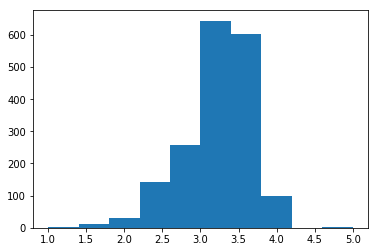

In [11]:
# histograms of ratings
plt.hist(cacao[cacao.columns[6]])


In [12]:
# Count of how many chocolate bars are from each company
company_count = cacao.groupby('Company').Company.count()
company_count = company_count.sort_values(ascending = False)
company_count.head()

Company
Soma        47
Bonnat      27
Fresco      26
Pralus      25
A. Morin    23
Name: Company, dtype: int64

In [13]:
# mean rating for each company
cacao.pivot_table('Rating', columns = 'Company', aggfunc = np.mean)

Company,A. Morin,AMMA,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),Alain Ducasse,Alexandre,Altus aka Cao Artisan,...,Xocolla,Zak's,Zart Pralinen,Zokoko,Zotter,hello cocoa,hexx,iQ Chocolate,organicfair,twenty-four blackbirds
Rating,3.380435,3.5,3.75,3.25,2.875,3.0,3.083333,2.7,3.5,2.85,...,2.625,3.208333,3.166667,3.55,3.308824,3.125,3.05,2.875,2.85,3.041667


In [14]:
# mean rating from each broad bean origin location
bbo = cacao.groupby('BroadBeanOrigin')['Rating'].mean()
bbo

BroadBeanOrigin
Africa, Carribean, C. Am.       2.750000
Australia                       3.250000
Belize                          3.234694
Bolivia                         3.197368
Brazil                          3.284483
Burma                           3.000000
Cameroon                        3.250000
Carribean                       2.968750
Carribean(DR/Jam/Tri)           3.000000
Central and S. America          3.250000
Colombia                        3.225000
Colombia, Ecuador               2.916667
Congo                           3.325000
Cost Rica, Ven                  2.750000
Costa Rica                      3.144737
Cuba                            3.250000
DR, Ecuador, Peru               3.750000
Dom. Rep., Madagascar           4.000000
Domincan Republic               3.190000
Dominican Rep., Bali            3.750000
Dominican Republic              3.209220
Ecuador                         3.134715
Ecuador, Costa Rica             3.250000
Ecuador, Mad., PNG              3.000000


In [24]:
#cut out the rows with no broad bean origin
#cut out the rows with no bean type
#cut out the rows with no broad bean origin and no bean type
#add min max columns to the table, maybe averages too?
# add a count of how many bars are in that catagory
##these are 3 seperate tables


#ask professor how to work with words bc the broad bean origin is shaky
#get screenshots of the maps from Tableau to put in doument and presentation
#talk to her about how to run a knn when you've only got 2 types of number to work with

#print(df.iloc[[0, 99, 999], [0, 3, 5]])
subsetted = cacao.iloc[:, [0, 4, 6, 7, 8]]

In [25]:
subsetted

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
0,A. Morin,63%,3.75,,Sao Tome
1,A. Morin,70%,2.75,,Togo
2,A. Morin,70%,3.00,,Togo
3,A. Morin,70%,3.50,,Togo
4,A. Morin,70%,3.50,,Peru
5,A. Morin,70%,2.75,Criollo,Venezuela
6,A. Morin,70%,3.50,,Cuba
7,A. Morin,70%,3.50,Criollo,Venezuela
8,A. Morin,70%,3.75,Criollo,Venezuela
9,A. Morin,70%,4.00,,Peru
